In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/Phishing_Email.csv')
df.head(3)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email


In [16]:
df.dropna(inplace=True)

In [17]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [18]:
df.rename(columns={"Email Text": "feature", "Email Type": "target"}, inplace=True)
df.head()

,feature,target
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [19]:
df['feature'][1]

'the other side of * galicismos * * galicismo * is a spanish term which names the improper introduction of french words which are spanish sounding and thus very deceptive to the ear . * galicismo * is often considered to be a * barbarismo * . what would be the term which designates the opposite phenomenon , that is unlawful words of spanish origin which may have crept into french ? can someone provide examples ? thank you joseph m kozono < kozonoj @ gunet . georgetown . edu >'

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), max_features=15000, smooth_idf=True, sublinear_tf=True)
df_feature = vectorizer.fit_transform(df['feature'])

In [21]:
from sklearn.model_selection import train_test_split

df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_feature, df['target'], test_size=0.2, random_state=42)

In [22]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy="prior")
dummy_model.fit(df_features_train, df_target_train)
target_prediction = dummy_model.predict(df_features_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(df_target_test, target_prediction))

                precision    recall  f1-score   support

Phishing Email       0.00      0.00      0.00      1518
    Safe Email       0.59      1.00      0.74      2209

      accuracy                           0.59      3727
     macro avg       0.30      0.50      0.37      3727
  weighted avg       0.35      0.59      0.44      3727



/Users/makarwuckert/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/makarwuckert/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/makarwuckert/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [24]:
accuracy_score = accuracy_score(df_target_test, target_prediction)

In [25]:
accuracy_score

0.5927019050174404

array([[   0, 1518],
       [   0, 2209]])

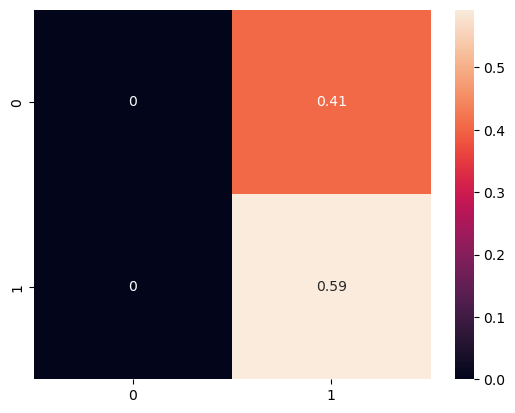

In [26]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(df_target_test, target_prediction)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True)
cf_matrix